# Crack Spread Forecast and Valuation of a Refining Operation

#### Travis Tredway and Ben Schultz

CBE 40455: Final Project  
December 14, 2017

### Introduction

Since the mid-twentieth century, the discovery of crude oil reserves and improvements in extraction technology have enabled developed countries to become ever more dependent on fossil fuels because of their high energy density. A country's dependence on these fossil fuels rests on the maintenance of low prices. Since energy markets are concerned with bulky, dangerous commodities that are transported long distances, often through some of the most poltiically unstable regions of the world, there are a large number of factors that can affect energy prices [2]. An understanding of energy markets is vital for refineries that wish to maximize profits by refining crude oil into valuable products such as heating oil and gasoline. 
#### Energy futures market
One important financial aspect of energy is the futures market. Exchange-traded futures and options provide important benefits including the ability to shift or manage the price risk of cash and physical market positions. Futures markets, such as NYMEX, allow energy companies to discover and establish competitive prices because they attract large pools of risk capital, making futures markets among the most liquid of all global financial markets [2].

#### Crack Spreads
Petroleum refinery executives are concerned with hedging the difference between their input costs and output prices, to offset potential losses or gains that may occur in the future. The profits of a refinery are tied to the spread between the price of crude oil and the prices of refined products, such as heating oil and gasoline. This difference is referred to as a crack spread because of the refining process that cracks crude oil into its products [1]. The price of crude oil and refined products are independently subject to market forces which puts refiners at enormous risk when crude oil price rises and refined product prices decline or remain stable. Since refiners are on both sides of the market their market risk can be greater than that incurred by companies who simply sell crude oil, or sell products to the wholesale and retail markets [1]. There are various types of crack spreads to help refiners hedge various ratios of crude oil and refined products based on the needs of the plan and the needs to serve the seasonal product demands. Refiners who wish to hedge a profitable margin might sell a wide spread (selling product futures and buying crude oil futures) whereas speculators who believe new demand will increase product value will buy a narrow crack spread (buying product futures and selling crude oil futures) [5].


### Project Goal
The following notebook utilizes the futures market to predict a future value of various crack spreads. This will enable a refiner to make the decision whether to sell or purchase crude oil and refined product futures. 
The notebook includes the following tasks:

1. Uploads historical price data for WTI Crude Futures, Gasoline Futures, and Heating Oil Futures 
2. Uses historical data to compute 2:1:1, 3:2:1, and 5:3:2 crack spreads (in $/bbl)
3. Computes the linear and logarithmic returns of each crack spread
4. Fits the historical price data for each spread to a normal distribution
5. Produces a one-month forecast of the value of each crack spread (including a 90% confidence interval)
6. Compares the forecasted average price to the historical data in order to determine if there is an opportunity for arbitrage
7. Uses a binomial model to determine the value of leasing 10000 bbl/ day refining capacity for one year

## Python Imports and Utilities

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import datetime
from pandas_datareader import data
from scipy.stats import norm,lognorm

## Import Futures Price Data

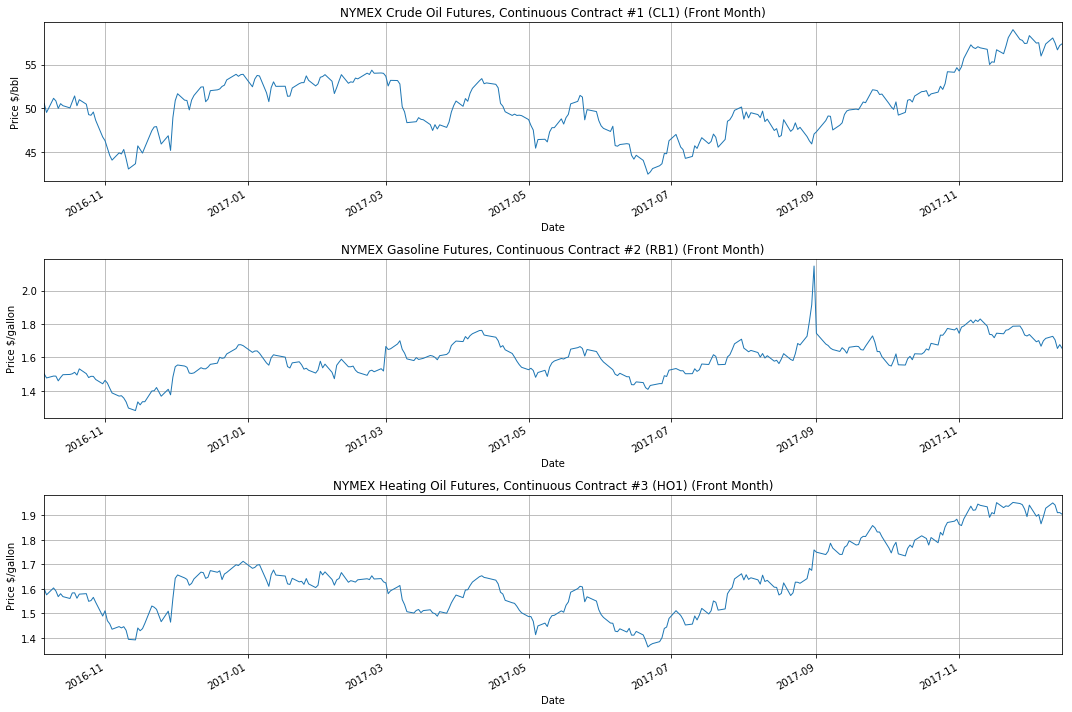

In [2]:
end = datetime.datetime.today().date()
start = end-datetime.timedelta(1.2*365)
crude_symbol = 'CHRIS/CME_CL1'
gas_symbol = 'CHRIS/CME_RB1'
heat_symbol = 'CHRIS/CME_HO1'
crude_description = 'NYMEX Crude Oil Futures, Continuous Contract #1 (CL1) (Front Month)'
gas_description = 'NYMEX Gasoline Futures, Continuous Contract #2 (RB1) (Front Month)'
heat_description = 'NYMEX Heating Oil Futures, Continuous Contract #3 (HO1) (Front Month)'

crude = data.DataReader(crude_symbol,"quandl",start,end)['Last']
gas = data.DataReader(gas_symbol,"quandl",start,end)['Last']
heat = data.DataReader(heat_symbol,"quandl",start,end)['Last']

plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
crude.plot(lw=1)
plt.title(crude_description)
plt.ylabel('Price $/bbl')
plt.grid()

plt.subplot(3,1,2)
gas.plot(lw=1)
plt.title(gas_description)
plt.ylabel('Price $/gallon')
plt.grid()

plt.subplot(3,1,3)
heat.plot(lw=1)
plt.title(heat_description)
plt.ylabel('Price $/gallon')
plt.grid()

plt.tight_layout()
plt.show()

## Crack Spreads

Crack spreads are affected by the independent market forces of crude oil and refined products. The price of crude varies according to type, such as light, heavy, sour or sweet. Additionally, seasonal demands for the end refined product can affect the spread, but on average a barrel of crude oil yields 50-55% gasoline and 20-25% heating oil [5]. Three standard crack spreads are used in most analyses, the 2:1:1, 3:2:1, and 5:3:2 spreads. The most widely used spread is the 3:2:1 crack spread [5]. Crack spreads are seasonal and thus have differing values depending on the spread used. The 3:2:1 spread, double-weighted in gasoline, tends to outperform the 2:1:1 spread when gasoline prices rise in relation to heating oil. Seasonally, that's typically in winter and spring ahead of the peak summer driving season [6]. A crude oil futures contract calls for delivery of 1,000 barrels whereas heating oil and gasoline contracts specify delivery of 42,000 gallons. Since a barrel holds 42 gallons, a simple conversion can allow for the generation of the following spreads.


#### 2:1:1 Crack Spread
Two barrels of crude oil are refined to create one barrel of gasoline and one barrel of heating oil:

$$ CS = 42*(HO + RB)/2 - CL $$
where the variables are defined as follows:
* $HO$ is the price of heating oil futures (in cents/gallon)
* $RB$ is the price of gasoline futures (in cents/gallon)
* $CL$ is the price of crude oil futures (in dollars/barrel)

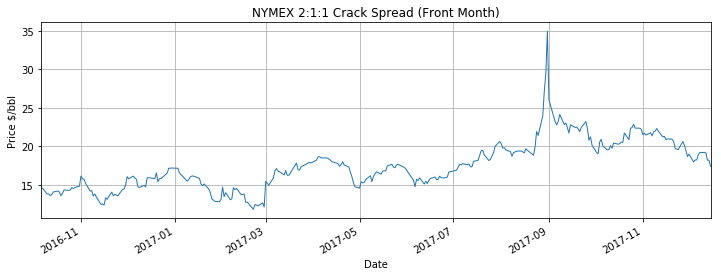

In [3]:
csa = 42*(heat + gas)/2 - crude

csa_description = 'NYMEX 2:1:1 Crack Spread (Front Month)'

plt.figure(figsize=(12,4))
csa.plot(lw=1)
plt.title(csa_description)
plt.ylabel('Price $/bbl')
plt.grid()

#### 3:2:1 Crack Spread
Three barrels of crude oil are refined to create two barrels of gasoline and one barrel of heating oil:

$$ CS = 42*(HO + 2RB)/3 - CL $$
where the variables are defined as follows:
* $HO$ is the price of heating oil futures (in cents/gallon)
* $RB$ is the price of gasoline futures (in cents/gallon)
* $CL$ is the price of crude oil futures (in dollars/barrel)

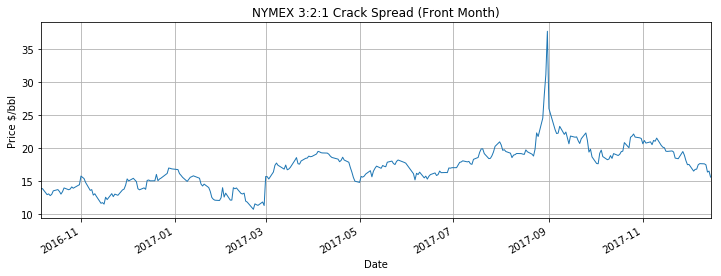

In [4]:
csb = 42*(heat + 2*gas)/3 - crude

csb_description = 'NYMEX 3:2:1 Crack Spread (Front Month)'

plt.figure(figsize=(12,4))
csb.plot(lw=1)
plt.title(csb_description)
plt.ylabel('Price $/bbl')
plt.grid()

#### 5:3:2 Crack Spread
Five barrels of crude oil are refined to create three barrels of gasoline and two barrels of heating oil:

$$ CS = 42*(2HO + 3RB)/5 - CL $$
where the variables are defined as follows:
* $HO$ is the price of heating oil futures (in cents/gallon)
* $RB$ is the price of gasoline futures (in cents/gallon)
* $CL$ is the price of crude oil futures (in dollars/barrel)

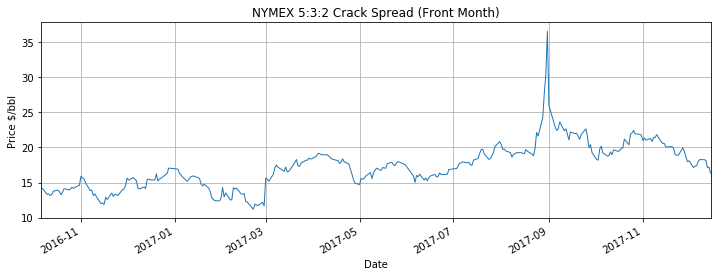

In [5]:
csc = 42*(2*heat + 3*gas)/5 - crude

csc_description = 'NYMEX 5:3:2 Crack Spread (Front Month)'

plt.figure(figsize=(12,4))
csc.plot(lw=1)
plt.title(csc_description)
plt.ylabel('Price $/bbl')
plt.grid()

## Plot of Historical Futures Value and Returns

### Crude Oil

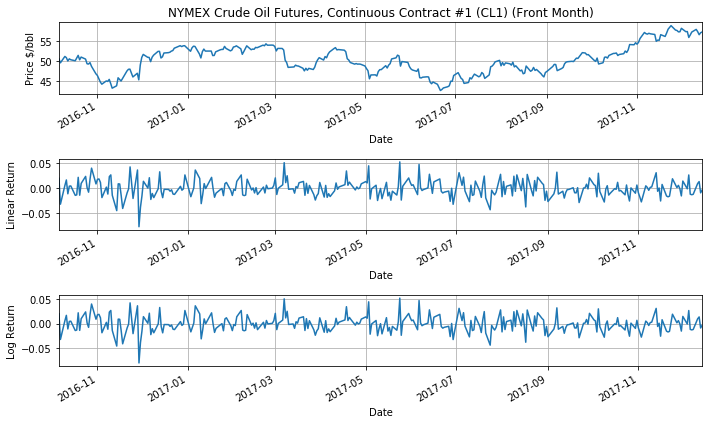

In [6]:
rlin_crude = (crude/crude.shift(1) - 1)
rlog_crude = np.log(crude/crude.shift(1))

rlin_crude = rlin_crude.dropna()
rlog_crude = rlog_crude.dropna()

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
crude.plot()
plt.ylabel('Price $/bbl')
plt.grid()
plt.title(crude_description)

plt.subplot(3,1,2)
rlin_crude.plot()
plt.grid()
plt.ylabel('Linear Return')

plt.subplot(3,1,3)
rlog_crude.plot()
plt.grid()
plt.ylabel('Log Return')

plt.tight_layout()

### Gasoline

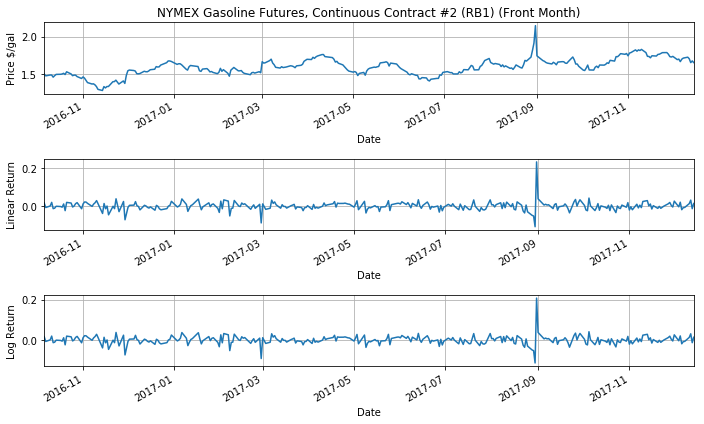

In [7]:
rlin_gas = (gas/gas.shift(1) - 1)
rlog_gas = np.log(gas/gas.shift(1))

rlin_gas = rlin_gas.dropna()
rlog_gas = rlog_gas.dropna()

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
gas.plot()
plt.ylabel('Price $/gal')
plt.grid()
plt.title(gas_description)

plt.subplot(3,1,2)
rlin_gas.plot()
plt.grid()
plt.ylabel('Linear Return')

plt.subplot(3,1,3)
rlog_gas.plot()
plt.grid()
plt.ylabel('Log Return')

plt.tight_layout()

### Heating Oil

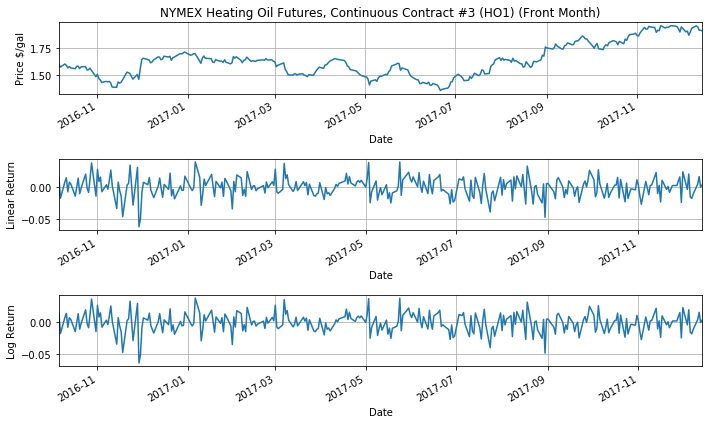

In [8]:
rlin_heat = (heat/heat.shift(1) - 1)
rlog_heat = np.log(heat/heat.shift(1))

rlin_heat = rlin_heat.dropna()
rlog_heat = rlog_heat.dropna()

plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
heat.plot()
plt.ylabel('Price $/gal')
plt.grid()
plt.title(heat_description)

plt.subplot(3,1,2)
rlin_heat.plot()
plt.grid()
plt.ylabel('Linear Return')

plt.subplot(3,1,3)
rlog_heat.plot()
plt.grid()
plt.ylabel('Log Return')

plt.tight_layout()

### Crack Spread Returns

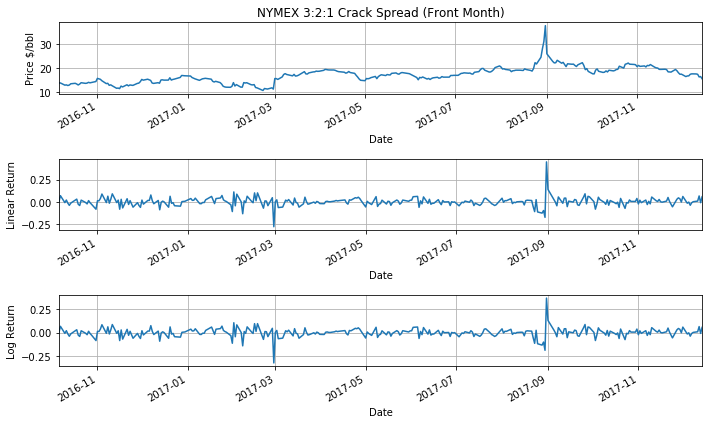

In [9]:
# 2:1:1 Spread
rlin_cracka = (csa/csa.shift(1) - 1)
rlog_cracka = np.log(csa/csa.shift(1))

rlin_cracka = rlin_cracka.dropna()
rlog_cracka = rlog_cracka.dropna()

# 3:2:1 Spread
rlin_crackb = (csb/csb.shift(1) - 1)
rlog_crackb = np.log(csb/csb.shift(1))

rlin_crackb = rlin_crackb.dropna()
rlog_crackb = rlog_crackb.dropna()

# 5:3:2 Spread
rlin_crackc = (csc/csc.shift(1) - 1)
rlog_crackc = np.log(csc/csc.shift(1))

rlin_crackc = rlin_crackc.dropna()
rlog_crackc = rlog_crackc.dropna()

# Plot data for the 3:2:1 Crack Spread
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
csb.plot()
plt.ylabel('Price $/bbl')
plt.grid()
plt.title(csb_description)

plt.subplot(3,1,2)
rlin_crackb.plot()
plt.grid()
plt.ylabel('Linear Return')

plt.subplot(3,1,3)
rlog_crackb.plot()
plt.grid()
plt.ylabel('Log Return')

plt.tight_layout()

## Summary of Crack Spread Statistical Properties

In [10]:
# 2:1:1 Spread
print('\033[1m' + '2:1:1 Crack Spread' + '\033[0m')
print('Linear Returns')
muLa, sigmaLa = norm.fit(rlin_cracka)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(muLa,100*252*muLa))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigmaLa,100*np.sqrt(252)*sigmaLa))
print()
print('Log Returns')
muLoga, sigmaLoga = norm.fit(rlog_cracka)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(muLoga,100*252*muLoga))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigmaLoga,100*np.sqrt(252)*sigmaLoga))
print()

# 3:2:1 Spread
print('\033[1m' + '3:2:1 Crack Spread' + '\033[0m')
print('Linear Returns')
muLb, sigmaLb = norm.fit(rlin_crackb)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(muLb,100*252*muLb))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigmaLb,100*np.sqrt(252)*sigmaLb))
print()
print('Log Returns')
muLogb, sigmaLogb = norm.fit(rlog_crackb)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(muLogb,100*252*muLogb))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigmaLogb,100*np.sqrt(252)*sigmaLogb))
print()

# 5:3:2 Spread
print('\033[1m' + '5:3:2 Crack Spread' + '\033[0m')
print('Linear Returns')
muLc, sigmaLc = norm.fit(rlin_crackc)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(muLc,100*252*muLc))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigmaLc,100*np.sqrt(252)*sigmaLc))
print()
print('Log Returns')
muLogc, sigmaLogc = norm.fit(rlog_crackc)
print('   mu = {0:12.8f}  (annualized = {1:.2f}%)'.format(muLogc,100*252*muLogc))
print('sigma = {0:12.8f}  (annualized = {1:.2f}%)'.format(sigmaLogc,100*np.sqrt(252)*sigmaLogc))

2:1:1 Crack Spread
Linear Returns
   mu =   0.00030600  (annualized = 7.71%)
sigma =   0.04249971  (annualized = 67.47%)

Log Returns
   mu =  -0.00058353  (annualized = -14.70%)
sigma =   0.04210912  (annualized = 66.85%)

3:2:1 Crack Spread
Linear Returns
   mu =   0.00084621  (annualized = 21.32%)
sigma =   0.05045096  (annualized = 80.09%)

Log Returns
   mu =  -0.00039272  (annualized = -9.90%)
sigma =   0.04964282  (annualized = 78.81%)

5:3:2 Crack Spread
Linear Returns
   mu =   0.00061376  (annualized = 15.47%)
sigma =   0.04713819  (annualized = 74.83%)

Log Returns
   mu =  -0.00047260  (annualized = -11.91%)
sigma =   0.04650049  (annualized = 73.82%)


## Fitting Crack Spread Futures Returns to a Normal Distribution

In the following cell, 1000 simulations are conducted to predict the value of each crack spread future one month from today's date based on a Geometric Brownian Motion model.

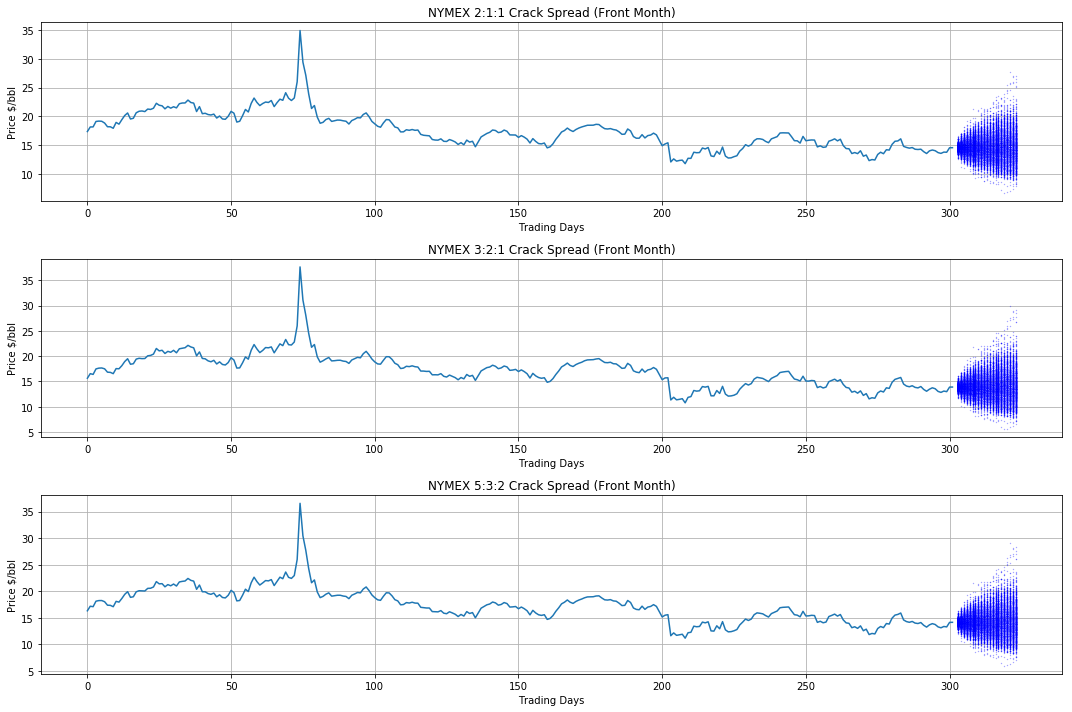

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(csa.values)
plt.title(csa_description)
plt.xlabel('Trading Days')
plt.ylabel('Price $/bbl')
plt.grid()

plt.subplot(3,1,2)
plt.plot(csb.values)
plt.title(csb_description)
plt.xlabel('Trading Days')
plt.ylabel('Price $/bbl')
plt.grid()

plt.subplot(3,1,3)
plt.plot(csc.values)
plt.title(csc_description)
plt.xlabel('Trading Days')
plt.ylabel('Price $/bbl')
plt.grid()

N = 1000   # number of simulations
T = 21     # simulation time horizon in trading days (trading days in one month)
dt = 1     # time step in trading days

for n in range(0,N):
    Pa = csa[-1]    # the last price in the historical data
    ka = len(csa)     # initialize vector
    Ploga = []        # create log of new price values
    kloga = []        # create log of new trade days
    
    Pb = csb[-1]
    kb = len(csb)
    Plogb = []
    klogb = []
    
    Pc = csc[-1]
    kc = len(csc)
    Plogc = []
    klogc = []
    
    for t in range(0,T):
        Z = norm.rvs()   # generate a random variable from a normal distribution
        
        Pa += Pa*(muLa*dt + sigmaLa*np.sqrt(dt)*Z)   # compute new price
        ka += 1
        Ploga.append(Pa)   # log calculated prices
        kloga.append(ka)   # log trade days
        
        Pb += Pb*(muLb*dt + sigmaLb*np.sqrt(dt)*Z)   # compute new price
        kb += 1
        Plogb.append(Pb)   # log calculated prices
        klogb.append(kb)   # log trade days
        
        Pc += Pc*(muLc*dt + sigmaLc*np.sqrt(dt)*Z)   # compute new price
        kc += 1
        Plogc.append(Pc)   # log calculated prices
        klogc.append(kc)   # log trade days
    
    plt.subplot(3,1,1)
    plt.plot(kloga,Ploga,'b.',ms=0.6,alpha=0.5)
    
    plt.subplot(3,1,2)
    plt.plot(klogb,Plogb,'b.',ms=0.6,alpha=0.5)
    
    plt.subplot(3,1,3)
    plt.plot(klogc,Plogc,'b.',ms=0.6,alpha=0.5)
    
plt.tight_layout()

## One Month Forecast Assuming Normal Distribution of Returns

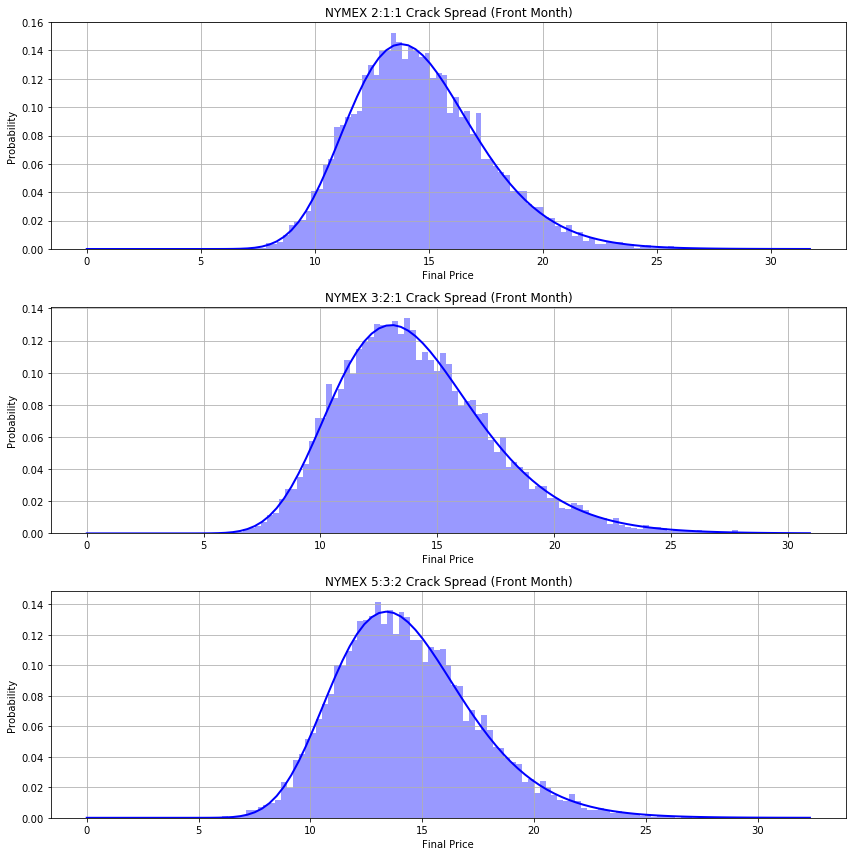

In [12]:
N = 10000    # number of simulations
T = 21    # simulation time horizon in trading days (trading days from Nov 3 to Dec 7, 2017)
dt = 1    # time step in trading days

# Initialize P
Pgbma = np.array([csa[-1]]*N)
Pgbmb = np.array([csb[-1]]*N)
Pgbmc = np.array([csc[-1]]*N)

# Generate random variables with (mean = mu*dt) and (std = sigma*sqrt(dt))
Zgeneratora = (np.array(norm.rvs(loc=muLa*dt, scale=sigmaLa*np.sqrt(dt), size=N)) for k in range(0,T))
Zgeneratorb = (np.array(norm.rvs(loc=muLb*dt, scale=sigmaLb*np.sqrt(dt), size=N)) for k in range(0,T))
Zgeneratorc = (np.array(norm.rvs(loc=muLc*dt, scale=sigmaLc*np.sqrt(dt), size=N)) for k in range(0,T))

for Z in Zgeneratora:
    Pgbma += Pgbma*Z   # new price is equal to previous price + return

for Z in Zgeneratorb:
    Pgbmb += Pgbmb*Z   # new price is equal to previous price + return
    
for Z in Zgeneratorc:
    Pgbmc += Pgbmc*Z   # new price is equal to previous price + return

# Generate histogram to display results of simulations
plt.figure(figsize=(12,12))

# 2:1:1 Spread
plt.subplot(3,1,1)
plt.xlabel('Final Price')
plt.ylabel('Probability')
plt.title(csa_description)
plt.grid()
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(Pgbma, bins=nbins, normed=1, alpha=0.4, color='b');

# Add a fitted distribution to the histogram
shape,loc,scale = lognorm.fit(Pgbma,floc=0)
x = np.linspace(0,max(Pgbma),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale)  # fitted distribution
plt.plot(x, pdf_fitted, 'b-',lw=2);

# 3:2:1 Spread
plt.subplot(3,1,2)
plt.xlabel('Final Price')
plt.ylabel('Probability')
plt.title(csb_description)
plt.grid()
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(Pgbmb, bins=nbins, normed=1, alpha=0.4, color='b');

# Add a fitted distribution to the histogram
shape,loc,scale = lognorm.fit(Pgbmb,floc=0)
x = np.linspace(0,max(Pgbmb),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale)  # fitted distribution
plt.plot(x, pdf_fitted, 'b-',lw=2);

# 5:3:2 Spread
plt.subplot(3,1,3)
plt.xlabel('Final Price')
plt.ylabel('Probability')
plt.title(csc_description)
plt.grid()
nbins = min(100,int(1.5*np.sqrt(N)))
plt.hist(Pgbmc, bins=nbins, normed=1, alpha=0.4, color='b');

# Add a fitted distribution to the histogram
shape,loc,scale = lognorm.fit(Pgbmc,floc=0)
x = np.linspace(0,max(Pgbmc),100)
pdf_fitted = lognorm.pdf(x, shape, loc=loc, scale=scale)  # fitted distribution
plt.plot(x, pdf_fitted, 'b-',lw=2);

plt.tight_layout()

## Comparison to Historical Data 
### Statistical Properties of Final Futures Value

In [13]:
# 2:1:1 Spread
print('\033[1m' + '2:1:1 Crack Spread' + '\033[0m')
print('Historical Price')
muHa, sigmaHa = norm.fit(csa)
print('         mu = ${0:2.2f}/bbl  '.format(muHa))
print('      sigma = ${0:2.2f}/bbl  '.format(sigmaHa))
print('      Today = ${0:2.2f}/bbl  '.format(csa[-1]))
print()

print('Estimated Future Price')
muPa, sigmaPa = norm.fit(Pgbma)
print('        mu = ${0:2.2f}/bbl  '.format(muPa))
print('     sigma = ${0:2.2f}/bbl  '.format(sigmaPa))
print()
print('90% Confidence Interval')
lowPa,highPa = norm.interval(0.90, loc=muPa, scale=sigmaPa)   # use normal distribution since N is sufficiently large
print('  ${0:2.2f}/bbl - ${1:.2f}/bbl  '.format(lowPa,highPa))
print()

# 3:2:1 Spread
print('\033[1m' + '3:2:1 Crack Spread' + '\033[0m')
print('Historical Price')
muHb, sigmaHb = norm.fit(csb)
print('         mu = ${0:2.2f}/bbl  '.format(muHb))
print('      sigma = ${0:2.2f}/bbl  '.format(sigmaHb))
print('      Today = ${0:2.2f}/bbl  '.format(csb[-1]))
print()
print('Estimated Future Price')
muPb, sigmaPb = norm.fit(Pgbmb)
print('        mu = ${0:2.2f}/bbl  '.format(muPb))
print('     sigma = ${0:2.2f}/bbl  '.format(sigmaPb))
print()
print('90% Confidence Interval')
lowPb,highPb = norm.interval(0.90, loc=muPb, scale=sigmaPb)   # use normal distribution since N is sufficiently large
print('  ${0:2.2f}/bbl - ${1:.2f}/bbl  '.format(lowPb,highPb))
print()

# 5:3:2 Spread
print('\033[1m' + '5:3:2 Crack Spread' + '\033[0m')
print('Historical Price')
muHc, sigmaHc = norm.fit(csc)
print('         mu = ${0:2.2f}/bbl  '.format(muHc))
print('      sigma = ${0:2.2f}/bbl  '.format(sigmaHc))
print('      Today = ${0:2.2f}/bbl  '.format(csc[-1]))
print()
print('Estimated Future Price')
muPc, sigmaPc = norm.fit(Pgbmc)
print('         mu = ${0:2.2f}/bbl  '.format(muPc))
print('      sigma = ${0:2.2f}/bbl  '.format(sigmaPc))
print()
print('90% Confidence Interval')
lowPc,highPc = norm.interval(0.90, loc=muPc, scale=sigmaPc)   # use normal distribution since N is sufficiently large
print('  ${0:2.2f}/bbl - ${1:.2f}/bbl  '.format(lowPc,highPc))

2:1:1 Crack Spread
Historical Price
         mu = $17.46/bbl  
      sigma = $3.16/bbl  
      Today = $14.58/bbl  

Estimated Future Price
        mu = $14.61/bbl  
     sigma = $2.90/bbl  

90% Confidence Interval
  $9.85/bbl - $19.38/bbl  

3:2:1 Crack Spread
Historical Price
         mu = $17.19/bbl  
      sigma = $3.25/bbl  
      Today = $13.89/bbl  

Estimated Future Price
        mu = $14.11/bbl  
     sigma = $3.29/bbl  

90% Confidence Interval
  $8.70/bbl - $19.51/bbl  

5:3:2 Crack Spread
Historical Price
         mu = $17.30/bbl  
      sigma = $3.20/bbl  
      Today = $14.16/bbl  

Estimated Future Price
         mu = $14.36/bbl  
      sigma = $3.11/bbl  

90% Confidence Interval
  $9.25/bbl - $19.47/bbl  


## Crack Spread Futures Conclusion

As seen in the above statistical data, all crack spreads have current and future values (~\$14) that are less than the historical averages (~\$17), which is most likely due to the decreasing costs of crude oil in todays energy market. The highest present day futures value is achieved by the 2:1:1 crack spread which also is predicted to have the largest value one month into the future as predicted by the model created. Since the current and future values of the crack spread are lower than the historical value, refiners shoulde buy this narrower crack spread by buying product futures and selling crude oil futures. This is because the spread should eventually widen and the demand for refined products should increase in the future. No significant conclusions can be made regarding which crack spread distribution is better than the others since their values are similar and all project a widening crack spread in one month as compared with today's closing price. Since the 3:2:1 crack spread is most common we determined that the future value of the spread is \$14.54/bbl which is approximately \$145,400/day for a spread with 10,000 barrels. 

## ---------------------------------------------------------------------

## Extending the Model: Binomial Model [4]
The binomial model provides a means of modeling the statistical distribution of future prices.  Given a current price $S_t$, there are two possible states for the next observed value $S_{t+\Delta t}$

$$ S_{t+\Delta t} = \left\{
                        \begin{array}{ll}
                            uS_t & \quad p \\
                            dS_t & \quad 1-p 
                        \end{array}
                    \right. $$

where $u$, $d$, and $p$ are chosen to match the statistics of the model above based on Geometric Brownian Motion.  The following parameter values are derived in Leunberger (2013).

$$ p = \frac{1}{2} + \frac{\nu\Delta t}{2 \sqrt{\sigma^2\Delta t + (\nu\Delta t)^2}}  $$

$$ ln \enspace u = \sqrt{\sigma^2\Delta t + (\nu \Delta t)^2} $$

$$ ln \enspace d = - \sqrt{\sigma^2\Delta t + (\nu \Delta t)^2} $$




Since the 3:2:1 crack spread is the most widely used, 
the following binomial model uses the data for the 3:2:1 spread.

In [14]:
# Time/period
dt = 21

# Calculate P, U, D parameters for 3:2:1 Crack Spread
nu = muLogb
sigma = sigmaLogb

p = 0.5 + nu*dt/2/np.sqrt(dt*sigma**2 + (nu*dt)**2)
u = np.exp(np.sqrt(dt*sigma**2 + (nu*dt)**2))
d = np.exp(-np.sqrt(dt*sigma**2 + (nu*dt)**2))

print('Probability (p) = ', round(p,4))
print('  Up Return (u) = ', round(u,4))
print('Down Return (d) = ', round(d,4))

Probability (p) =  0.4819
  Up Return (u) =  1.2556
Down Return (d) =  0.7964


This model is easily extended to multiple time steps.  In this investigation, 12 time steps of one month each will be taken to assess the value of leasing 10,000 bbl/day refining capacity for a duration of 1 year.

Each step forward in time introduces an additional state to the set of possible outcomes. 

For the purpose of coding, Python dictionaries will be used to store future prices $S^f$. Future prices are indexed by two subscripts, $k$ and $s$, such that $S^{f}[k,s]$ corresponds to the price at time $t + k\Delta t$ in state $s$.

The inital node will be set equal to the last observed price, $S^{f}_{0,0} = S_t $.  For each $k$ and $s$ there are two subsequent nodes.

$$ S^{f}_{k+1,\enspace s} = u S^{f}_{k,\enspace s} $$

$$ S^{f}_{k+1,\enspace s+1} = \frac{d}{u} S^{f}_{k+1,\enspace s} $$

These two equations can be combined by eliminating the common term $S^{f}_{k,\enspace s}$ to yield

$$ S^{f}_{k+1,\enspace s} = u S^{f}_{k,\enspace s} $$

$$ S^{f}_{k+1, \enspace s+1} = \frac{d}{u} S^{f}_{k+1,\enspace s} $$

When solved explicitly, these formula yield the following relation

$$ S^{f}_{k,\enspace s} = u^{k-s} d^s S^{f}_{0,0} $$

which is the formula used in the following section of code to compute values in the binomial lattice.

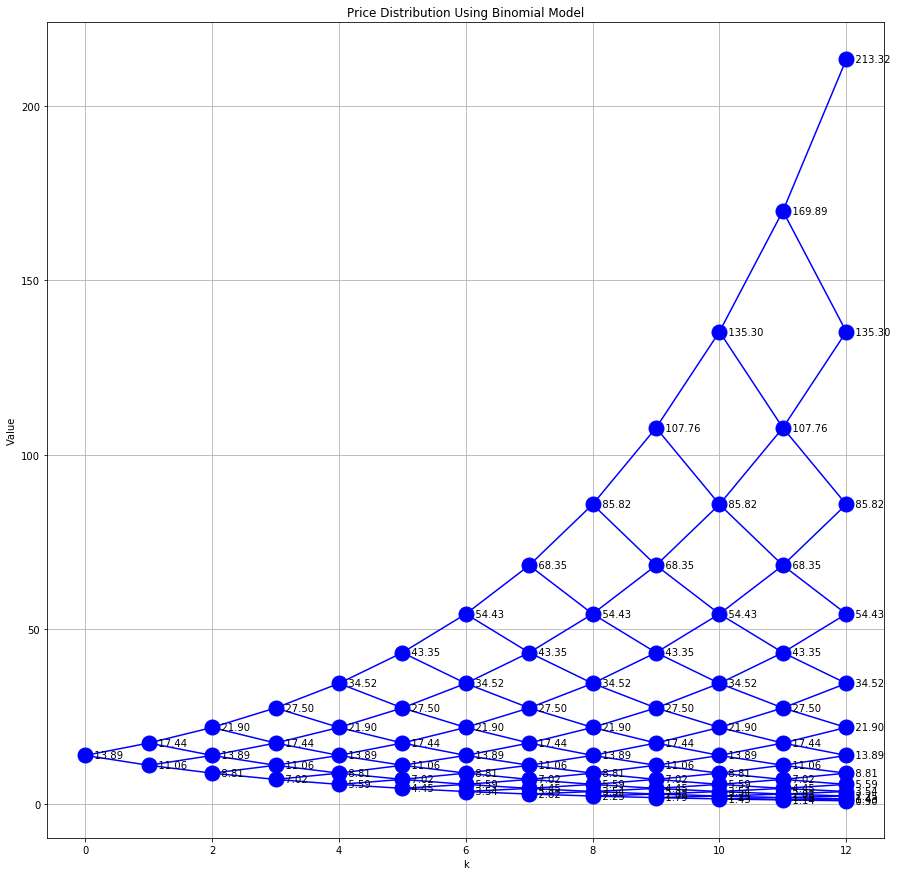

In [15]:
N = 12

# initialize Sf
Sf = {}
Sf[0,0] = csb[-1]

# compute values to fill in lattice
for k in range(1,N+1):
    for s in range(0,k+1):
        Sf[k,s] = u**(k-s)*d**s*Sf[0,0]
        
%matplotlib inline
def Sdisplay(Sf):
    plt.figure(figsize=(15,15))
    for k,s in Sf.keys():
        plt.plot(k,Sf[k,s],'.',ms=30,color='b')
        plt.text(k,Sf[k,s],'   {0:.2f}'.format(Sf[k,s]),ha='left',va='center')
        if (k > 0) & (s < k):
            plt.plot([k-1,k],[Sf[k-1,s],Sf[k,s]],'b')
            plt.plot([k-1,k],[Sf[k-1,s],Sf[k,s+1]],'b')
        plt.xlabel('k')
        plt.ylabel('Value')
        plt.title('Price Distribution Using Binomial Model')
        plt.grid()
        
Sdisplay(Sf)

The probability of reaching state $s$ at time step $k$ is denoted by $P_{k,\enspace s}$.  This can be computed given the probability of the preceding states adn the conditional probabilities $p$ and $1-p$.

$$ P_{k,\enspace s} = p P_{k-1,\enspace s} + (1-p) P_{k-1,\enspace s-1} $$

The following cell evaluates price and probability for a binomial model and plots the average price.

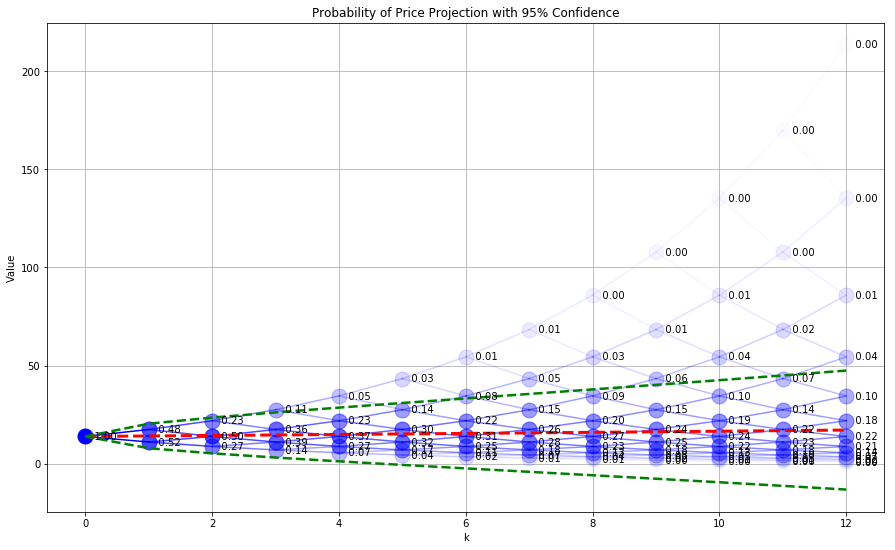

In [16]:
# initialize P
P = {}
P[0,0] = 1

for k in range(0,N):
    P[k+1,0] = p*P[k,0]
    P[k+1,k+1] = (1-p)*P[k,k]
    for s in range(1,k+1):
        P[k+1,s] = p*P[k,s] + (1-p)*P[k,s-1]
        
%matplotlib inline
def SPdisplay(Sf,P,D):
    plt.figure(figsize=(15,9))
    nPeriods = max([k for k,s in Sf.keys()]) + 1
    Sfmean = np.zeros(N+1)
    Sfvar = np.zeros(N+1)
    for k,s in Sf.keys():
        Sfmean[k] += Sf[k,s]*P[k,s]
        Sfvar[k] += Sf[k,s]**2*P[k,s]
        plt.plot(k,Sf[k,s],'.',ms=30,color='b',alpha=np.sqrt(P[k,s]))
        if (k > 0) & (s < k):
            plt.plot([k-1,k],[Sf[k-1,s],Sf[k,s]],'b',alpha=np.sqrt(P[k-1,s]))
            plt.plot([k-1,k],[Sf[k-1,s],Sf[k,s+1]],'b',alpha=np.sqrt(P[k-1,s]))
    for k,s in D.keys():
            plt.text(k,Sf[k,s],'   {0:.2f}'.format(D[k,s]),ha='left',va='center')
    plt.plot(range(0,N+1),Sfmean,'r--',lw=3)
    Sfstdev = np.sqrt(Sfvar - Sfmean**2)
    plt.plot(range(0,N+1),Sfmean + 1.96*Sfstdev,'g--',lw=2.5)
    plt.plot(range(0,N+1),Sfmean - 1.96*Sfstdev,'g--',lw=2.5)
    plt.xlabel('k')
    plt.ylabel('Value')
    plt.grid()
    plt.title('Probability of Price Projection with 95% Confidence')
        
SPdisplay(Sf,P,P)

### European Call Option [4]
A European Call Option is a contract the provides the holder with the right, but not the obligation, to purchase an asset at a specified price and date in the future. The specified price is generally called the strike price, and the specified date is the expiration date.  The purpose of the call option is to reduce the holder's exposure to the risk of increasing prices.

The value of the call option upon expiration depends on the price of underlying asset. If the asset spot price $S$ is greater than the strike price $K$, then the call option is worth the difference $S-K$ because that is amount needed to fulfill the contract in the spot market.

On the other hand, if the asset price falls below the strike price, then the option contract has no value since the holder could buy the asset on the spot market for less than the strike price.

$$C_{N,s} = \max(0, S^f_{N,s})$$
The next cell demonstrates the terminal value of a european call option where the strike price is equal to the initial price (known as an 'at the money' strike).

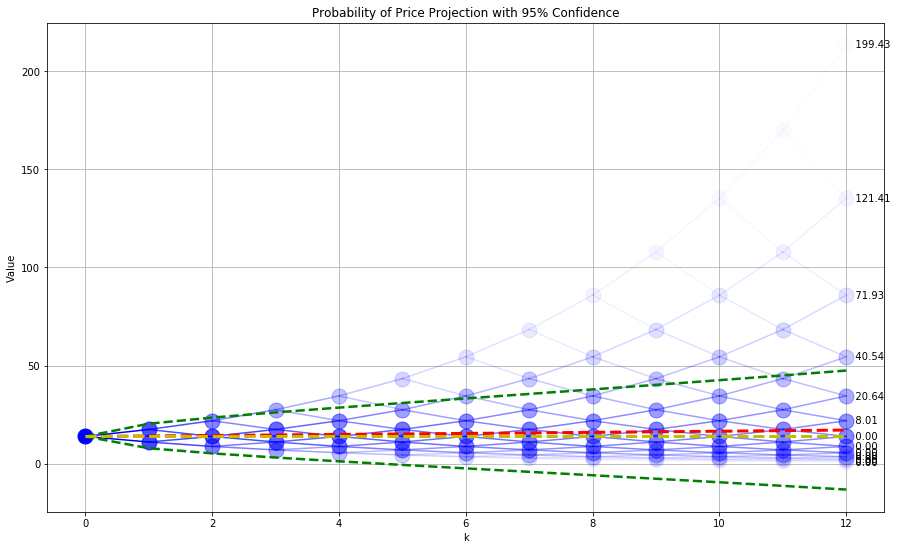

In [17]:
# set the strike price equal to the initial price
K = csb[-1]

C = {}
for s in range(0,N+1):
    C[N,s] = max(0,Sf[N,s] - K)
    
SPdisplay(Sf,P,C)
plt.plot([0,N],[K,K],'y--',lw=3)

### Pricing the Call Option
To price a call option, consider the construction of a portfolio composed of the underlying asset and cash that would have the same payoff. At node $k,s$, the portfolio is given by

$$C_{k,s} = x_{k,s}S^f_{k,s} + y_{k,s}$$
where $x_{k,s}$ is the number of units of the underlying asset, and $y_{k,s}$ is the cash component of the portfolio. The subsequent value of the portfolio at $k+1$ has two possible values

$$\begin{align*}
C_{k+1,s} = x_{k,s}uS^f_{k,s} + (1+r)y_{k,s} \\
C_{k+1,s+1} = x_{k,s}dS^f_{k,s} + (1+r)y_{k,s}
\end{align*}$$
where $r$ is the per period interest rate for cash. Solving for $x_{k,s}$ and $y_{k,s}$,

$$\begin{align*}
x_{k,s} = \frac{C_{k+1,s} - C_{k+1,s+1}}{(u-d)S^f_{k,s}} \\
y_{k,s} = \frac{uC_{k+1,s+1}-dC_{k+1,s}}{(1+r)(u-d)}
\end{align*}$$
Inserting these solutions into the original expression,

$$C_{k,s} = \frac{(\left[(1+r) - d\right]C_{k+1,s} + \left[u - (1+r)\right]C_{k+1,s+1}}{(1+r)(u-d)}$$
This can be expressed in a far more suggestive form

$$C_{k,s} = \frac{1}{1+r}\left[\underbrace{\frac{(1+r)-d}{u-d}}_{q}C_{k+1,s} + \underbrace{\frac{u-(1+r)}{u-d}}_{1-q}C_{k+1,s+1}\right]$$
or

$$C_{k,s} = \frac{1}{1+r}\left[q C_{k+1,s} + (1-q)C_{k+1,s+1}\right]$$
This expression has two important consequences. The first is an interpretation as a 'risk-neutral' probability such that $C_{k,s}$ is the 'expected value' of the call option. This is not the real-world probability! Instead, it is different measure that provides a very useful means of computing the value of options.

The value of leasing 10000 bbl/day of refining capacity is $43174.72/day


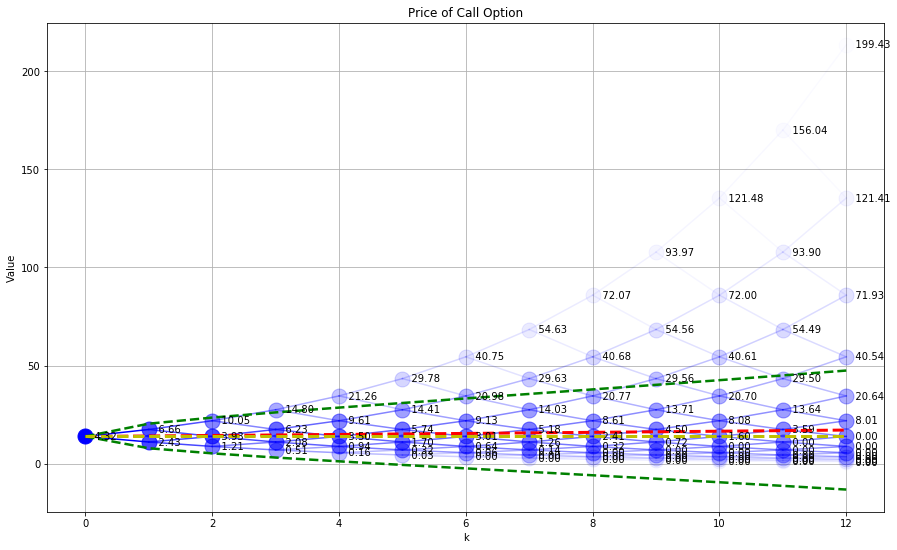

In [18]:
# average annual interest rate - corrected for monthly basis
r=.03/12

# compute the risk-neutral probability
q=(1+r-d)/(u-d)

C = {}
x = {}
y = {}

for s in range(0,N+1):
    C[N,s] = max(0,Sf[N,s] - K)
    
for k in reversed(range(0,N)):
    for s in range(0,k+1):
        C[k,s] = (q*C[k+1,s]+(1-q)*C[k+1,s+1])/(1+r)
        x[k,s] = (C[k+1,s]-C[k+1,s+1])/(u-d)/Sf[k,s]
        y[k,s] = C[k,s] - x[k,s]*Sf[k,s]
        
SPdisplay(Sf,P,C)
plt.plot([0,N],[K,K],'y--',lw=3)
plt.title('Price of Call Option')

# value of 10000 bbl/day refining capacity
val = C[0,0]*10000
print('The value of leasing 10000 bbl/day of refining capacity is ${0:2.2f}/day'.format(val))

## Binomial Model Conclusions

The results above help determine the value of leasing 10000 bbl/day refining capacity for one year. The value of the lease for one year is estimated to be \$4.43/bbl which would be a total future value of the spread of \$44,342.00/day for 10,000 barrels. This represents the 'no arbitrage' price, where any other price could lead to a risk-free opportunity to buy or sell refining capacity. This is significantly different than the future value of \$145,400/day predicted by the first model created above. This discrepancy is expected as the second model computes the difference between the future value and the strike price of the lease.  Since the output of the second model is non-zero, the option contract does have value because the holder could not buy the asset on the spot market for less than the strike price.

### References

1. Introduction to Crack Spreads – CME Group - CME Group. (2017, May 9). Retrieved December 10, 2017, from http://www.cmegroup.com/education/introduction-to-crack-spreads.html
2. James, T. (2008). $\textit{Energy Markets: Price Risk Management and Trading}.$ Singapore: John Wiley.
3. Kantor, J. (2017). Geometric Brownian Motion Python Notebook. CBE 40445 Process Operations.
3. Kantor, J. (2017). Binomial Model for Pricing Options Python Notebook. CBE 40445 Process Operations.
3. Moore, S. (2006). $\textit{The Encyclopedia of Commodity and Financial Spreads}$. John Wiley & Sons.
4. Zigler, B. (2009, March 05). Crack Spread Calculations Demystified. Retrieved December 10, 2017, from https://seekingalpha.com/article/124289-crack-spread-calculations-demystified?page=2